In [48]:
from pathlib import Path
from tempfile import TemporaryDirectory

import matplotlib.pyplot as plt
import numpy as np
import scipy.io

import suite2p
from suite2p import run_s2p, default_ops
# ops = default_ops() # populates ops with the default options
import sys
sys.path.insert(0, 'C:/Users/lan/Documents/repos/suite2p') # option to import from github folder

import seaborn as sns
import matplotlib as mpl
mpl.rcParams.update({
    'axes.spines.left': True,
    'axes.spines.bottom': False,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'legend.frameon': False,
    'figure.subplot.wspace': .01,
    'figure.subplot.hspace': .01,
#     'figure.figsize': (18, 13),
    'ytick.major.left': True,
})
jet = mpl.cm.get_cmap('jet')
jet.set_bad(color='k')

C:\Users\lan\anaconda3\envs\suite2p\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("jet"))


In [2]:
t = 'D:\Lan_temp\suite2p\plane0_i1322_200803_002'
output_op = np.load(Path(t).joinpath('ops.npy'), allow_pickle=True).item()
output_op['save_path'] = t

In [6]:
stats_file = Path(output_op['save_path']).joinpath('stat.npy')
stats = np.load(stats_file, allow_pickle=True)
iscell = np.load(Path(output_op['save_path']).joinpath('iscell.npy'), allow_pickle=True)[:, 0].astype(bool)
iscell.shape

(4349,)

In [81]:
f_original = np.load(Path(output_op['save_path']).joinpath('F.npy'))
f_neuropils = np.load(Path(output_op['save_path']).joinpath('Fneu.npy'))
spks = np.load(Path(output_op['save_path']).joinpath('spks.npy'))
f_cells = f_original - ops['neucoeff'] * f_neuropils

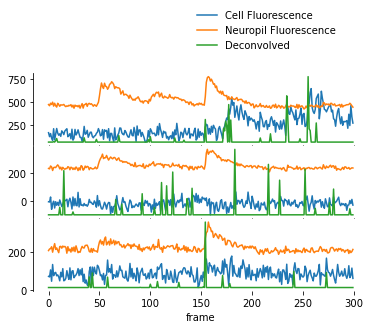

In [86]:
# plt.figure(figsize=[20,20])
rois = np.arange(len(f_cells))[::2000]
frame_range = np.arange(100,400)

for i, roi in enumerate(rois):
    plt.subplot(len(rois), 1, i+1, )
    f = f_cells[roi][frame_range]
    f_neu = f_neuropils[roi][frame_range]
    sp = spks[roi][frame_range]
    
    # Adjust spks range to match range of fluroescence traces
    fmax = np.maximum(f.max(), f_neu.max())
    fmin = np.minimum(f.min(), f_neu.min())
    frange = fmax - fmin 
    sp /= sp.max()
    sp *= frange
    
    plt.plot(f, label="Cell Fluorescence")
    plt.plot(f_neu, label="Neuropil Fluorescence")
    plt.plot(sp + fmin, label="Deconvolved")
#     plt.xticks(np.arange(0, f_cells.shape[1], f_cells.shape[1]/10))
#     plt.ylabel(f"ROI {roi}", rotation=0)
    plt.xlabel("frame")
    if i == 0:
        plt.legend(bbox_to_anchor=(0.93, 2))

In [25]:
sum(iscell), sum(~iscell)

(1153, 3196)

In [50]:
f_neuron = f_cells[iscell,:]
# f_neuron = f_original[iscell,:]
f_neuron.shape

(1153, 99999)

In [51]:
tt = np.mean(f_neuron, axis=0)
tt.max(), tt.min(), np.median(tt)

(352.83978, 120.1908, 145.31612)

<AxesSubplot:ylabel='Count'>

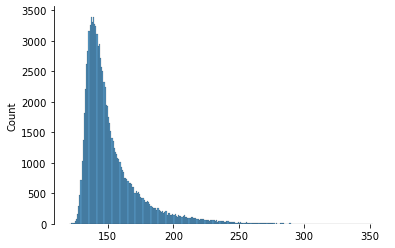

In [52]:
sns.histplot(tt)

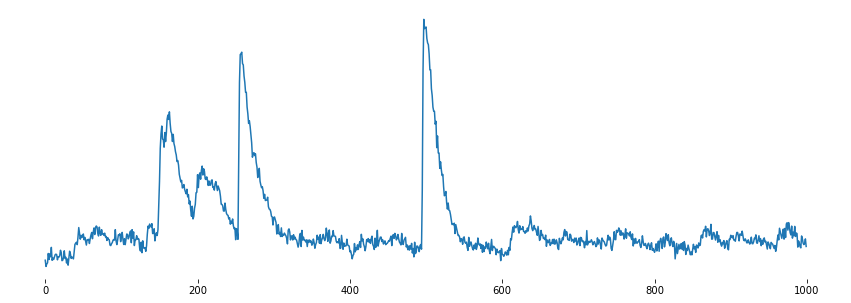

In [35]:
plt.figure(figsize=[15,5])
plt.plot(tt[0:1000])
# plt.yticks(np.arange(0, 1, step=0.2))

In [53]:
temp_dic = {"f_neuron": f_neuron}
scipy.io.savemat("f_neuron.mat", temp_dic)

### after selecting responsive cells in matlab

In [57]:
stats

array([{'ypix': array([59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61,
       62, 62, 62, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 63, 63,
       63, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 65, 65, 65, 65, 65, 65,
       65, 65, 65, 65, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 67, 67,
       67, 67, 67, 67, 67, 68, 68, 68, 68, 68]), 'xpix': array([312, 313, 314, 315, 311, 312, 313, 314, 315, 316, 310, 311, 312,
       313, 314, 315, 316, 309, 310, 311, 312, 313, 314, 315, 316, 317,
       309, 310, 311, 312, 313, 314, 315, 316, 317, 309, 310, 311, 312,
       313, 314, 315, 316, 317, 318, 309, 310, 311, 312, 313, 314, 315,
       316, 317, 318, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318,
       309, 310, 311, 312, 313, 314, 315, 316, 311, 312, 313, 314, 315]), 'lam': array([0.00230316, 0.00246646, 0.00334628, 0.00306166, 0.00324213,
       0.00838477, 0.01041158, 0.01050085, 0.00802989, 0.00290577,
       0.00515607, 0.01046616, 0.01653095, 0.0167104

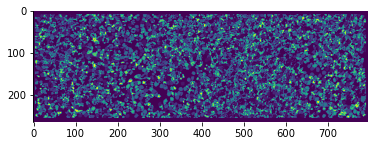

In [72]:
# stat = np.load('stat.npy')
# ops = np.load('ops.npy').item()

stat = stats
ops = output_op
im = np.zeros((ops['Ly'], ops['Lx']))

ncells = len(iscell)
for n in range(0,ncells):
    ypix = stat[n]['ypix'][~stat[n]['overlap']]
    xpix = stat[n]['xpix'][~stat[n]['overlap']]
    im[ypix,xpix] = n+1

plt.imshow(im)
plt.show()

In [78]:
stat[0]['ypix'][~stat[0]['overlap']].shape

(56,)